In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
folder = 'E://Dima//PhD//Papers//archive//data//verify_results/'

In [3]:
def get_conv_rate (fname, p_column, stop_index, delta=100, normalized=False, is_plot=False):
    df_p = pd.read_csv(fname)
    rho = df_p[p_column]
    rho = rho[:stop_index]
    rho_delta = rho.diff()
    rho_delta = rho_delta[-delta:]
    max_rho = max(rho[-delta:])
        
    if normalized:
        return sum(abs(rho_delta))/100/max_rho 
    else:            
        return sum(abs(rho_delta))/100  

## M1

In [93]:
get_conv_rate(folder + 'model_80_1_80_500_p1_p2_smc.csv', 'rho_p1', 5371)

8.225153352698134e-05

In [94]:
get_conv_rate(folder + 'model_80_1_80_500_p1_p2_smc.csv', 'rho_p2', 5343)

5.8324755006309296e-05

In [95]:
get_conv_rate(folder + 'model_80_1_80_500_p3_smc.csv', 'rho_p3', 2409)

0.00020694902953240723

In [96]:
get_conv_rate(folder + 'model_80_1_80_500_p4_smc.csv', 'rho_p4', 1530)

0.00010089013788437184

In [97]:
get_conv_rate(folder + 'model_80_1_80_500_p5_smc.csv', 'rho_p5', 5459)

2.515887081708662e-05

In [100]:
get_conv_rate(folder + 'model_80_1_80_500_p6_smc.csv', 'rho_p6', 104467)

1.8260484658222386e-07

## M2

In [89]:
get_conv_rate(folder + 'model_60_4_80_500_p1_p2_smc.csv', 'rho_p1', 3055)

0.00011376181351889641

In [90]:
get_conv_rate(folder + 'model_60_4_80_500_p1_p2_smc.csv', 'rho_p2', 3833)

0.00010609198721139968

In [91]:
get_conv_rate(folder + 'model_60_4_80_500_p3_smc.csv', 'rho_p3', 4655)

0.00010022849953964464

In [92]:
get_conv_rate(folder + 'model_60_4_80_500_p4_smc.csv', 'rho_p4', 1564)

5.109734761130969e-05

In [88]:
get_conv_rate(folder + 'model_60_4_80_500_p5_smc.csv', 'rho_p5', 45487)

1.9080275623444e-06

In [87]:
get_conv_rate(folder + 'model_60_4_80_500_p6_smc.csv', 'rho_p6', 8577)

4.2616756267938126e-07

In [101]:
fname_p1 = folder + 'model_60_4_80_500_p1_p2_smc.csv'
df_p = pd.read_csv(fname_p1)
rho = df_p['rho_p1']
rho = rho[:500]
rho_delta = rho.diff()
rho_delta = rho_delta[-10:]
sum(abs(rho_delta))/100

0.0007674316549236726

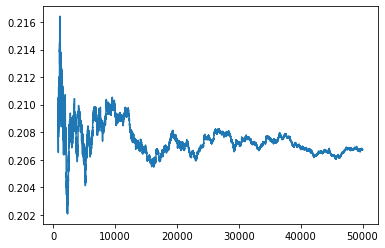

In [114]:
plt.plot(df_p['rho_p1'][800:50000])

In [270]:
rho[-1:]

580740    0.003496
Name: rho_p6, dtype: float64

In [5]:
def get_close_gt(fname, p_column, gt_p, rolling_window=100, gt_closeness=0.001):
    df_p = pd.read_csv(fname)
    rho = df_p[p_column]
    #print('last rho={}'.format(rho[-1:]))
    # rho_windowed = rho.rolling(window=rolling_window).mean()
    tmp = abs(rho - gt_p)<gt_closeness
    cut_off = rho.index[tmp.rolling(rolling_window).sum()==rolling_window/2][0]
    #cut_off = (tmp.index[tmp==True])[0]
    plt.plot(df_p[p_column][800:100000])
    print('delta={}'.format(max(df_p[p_column][800:100000])-min(df_p[p_column][800:100000])))
    print(cut_off)

In [59]:
def get_close_gt(fname, p_column, gt_p, rolling_window=100, gt_closeness=0.001):
    df_p = pd.read_csv(fname)
    rho = df_p[p_column]
    #print('last rho={}'.format(rho[-1:]))
    # rho_windowed = rho.rolling(window=rolling_window).mean()
    rho_coeff = (rho[0:1000].mean())
    print('rho_coeff={}'.format(rho_coeff))
    
    tmp = abs(rho - gt_p)
    tmp = tmp.rolling(window=rolling_window).mean()<gt_closeness*rho_coeff
    cut_off = rho.index[tmp.rolling(rolling_window).sum()==rolling_window/2][0]
    #cut_off = (tmp.index[tmp==True])[0]
    plt.plot(df_p[p_column][800:100000])
    print('delta={}'.format(max(df_p[p_column][800:100000])-min(df_p[p_column][800:100000])))
    print(cut_off)

## M1

rho_coeff=0.33197772414898247
delta=0.03357417277210961
5371


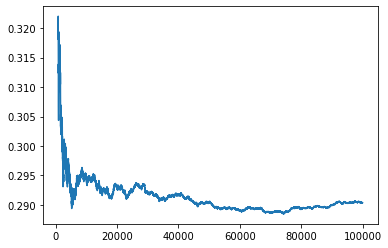

In [80]:
get_close_gt(folder + 'model_80_1_80_500_p1_p2_smc.csv', 'rho_p1', 0.291564, rolling_window=1000, gt_closeness=0.01)

rho_coeff=0.2370325791764895
delta=0.026861563255849152
5343


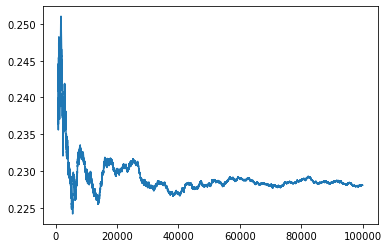

In [79]:
get_close_gt(folder + 'model_80_1_80_500_p1_p2_smc.csv', 'rho_p2', 0.228, rolling_window=1000, gt_closeness=0.01)

rho_coeff=0.3695732933830571
delta=0.026651030659534336
2409


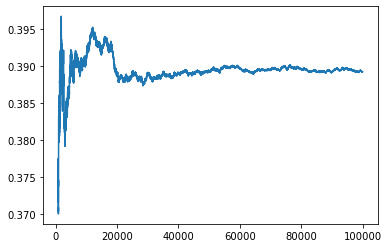

In [78]:
get_close_gt(folder + 'model_80_1_80_500_p3_smc.csv', 'rho_p3', 0.38826, rolling_window=1000, gt_closeness=0.01)

rho_coeff=0.9071372281145337
delta=0.01176608628017295
1530


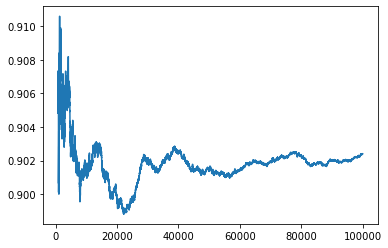

In [77]:
get_close_gt(folder + 'model_80_1_80_500_p4_smc.csv', 'rho_p4', 0.902955, rolling_window=1000, gt_closeness=0.01)

rho_coeff=0.12178939605894569
delta=0.02684196900290617
5459


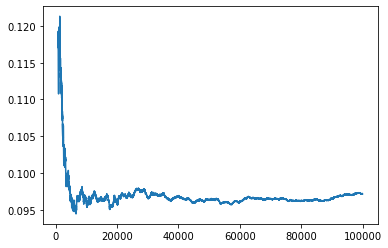

In [76]:
get_close_gt(folder + 'model_80_1_80_500_p5_smc.csv', 'rho_p5', 0.097069, rolling_window=1000, gt_closeness=0.01)

rho_coeff=0.027955821015643426
delta=0.006019273678953493
104467


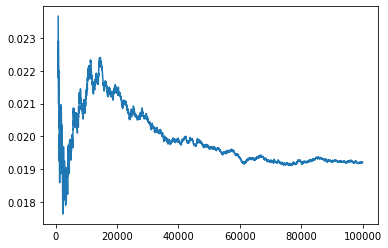

In [75]:
get_close_gt(folder + 'model_80_1_80_500_p6_smc.csv', 'rho_p6', 0.01886, 1000, 0.01)

## M2

rho_coeff=0.2185999021233915
delta=0.014354281900899657
3055


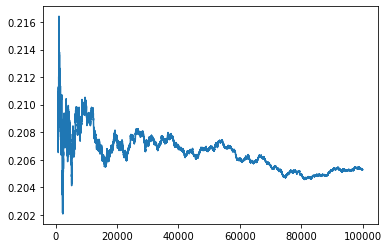

In [81]:
get_close_gt(folder + 'model_60_4_80_500_p1_p2_smc.csv', 'rho_p1', 0.20554, rolling_window=1000, gt_closeness=0.01)

rho_coeff=0.2470063402034104
delta=0.027296772465514957
3833


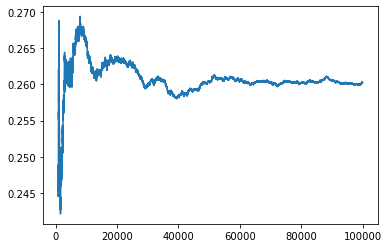

In [82]:
get_close_gt(folder + 'model_60_4_80_500_p1_p2_smc.csv', 'rho_p2', 0.259878, rolling_window=1000, gt_closeness=0.01)

rho_coeff=0.3867093468840775
delta=0.021544667407249862
4655


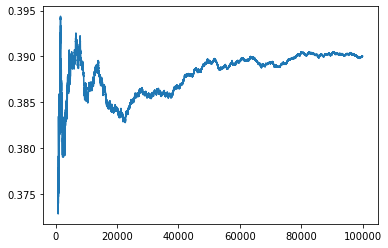

In [83]:
get_close_gt(folder + 'model_60_4_80_500_p3_smc.csv', 'rho_p3', 0.389114, rolling_window=1000, gt_closeness=0.01)

rho_coeff=0.9408363855458547
delta=0.009069422693164353
1564


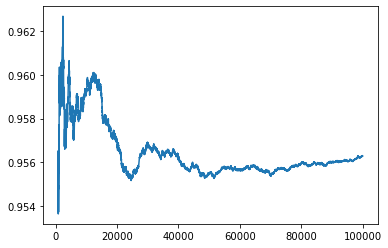

In [84]:
get_close_gt(folder + 'model_60_4_80_500_p4_smc.csv', 'rho_p4', 0.957165, rolling_window=1000, gt_closeness=0.01)

rho_coeff=0.06121166870745253
delta=0.01262544578443918
45487


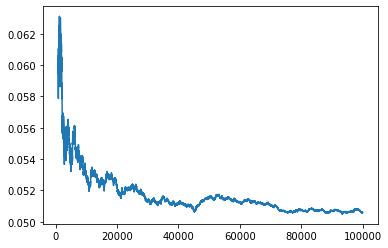

In [85]:
get_close_gt(folder + 'model_60_4_80_500_p5_smc.csv', 'rho_p5', 0.050303, rolling_window=1000, gt_closeness=0.01)

rho_coeff=0.009847232641360414
delta=0.002928203040173724
8577


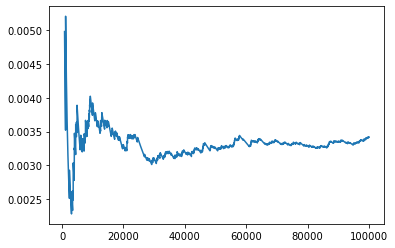

In [86]:
get_close_gt(folder + 'model_60_4_80_500_p6_smc.csv', 'rho_p6', 0.003496, 1000, 0.01)

In [198]:
rho

0         0.666667
1         0.750000
2         0.800000
3         0.666667
4         0.571429
            ...   
580736    0.389115
580737    0.389114
580738    0.389113
580739    0.389113
580740    0.389114
Name: rho_p3, Length: 580741, dtype: float64

In [45]:
# get_close_gt(folder + 'model_80_1_80_500_p6_smc.csv', 'rho_p6', 0.01886, 100, 0.0001)
fname_p1 = folder + 'model_60_4_80_500_p6_smc.csv'
p_column='rho_p6' 
gt_p=0.003496
rolling_window=1000
gt_closeness=0.0001
    
df_p = pd.read_csv(fname_p1)
rho = df_p[p_column]
rho_windowed = rho.rolling(window=rolling_window).mean()
tmp = abs(rho_windowed - gt_p)<gt_closeness
# tmp = abs(rho - gt_p)<gt_closeness
cut_off = rho.index[tmp.rolling(rolling_window).sum()==rolling_window/2][0]
print(cut_off)

5723


0.0038314176245210726

In [449]:
abs(rho_windowed[5723]-gt_p)

8.593671550128452e-05

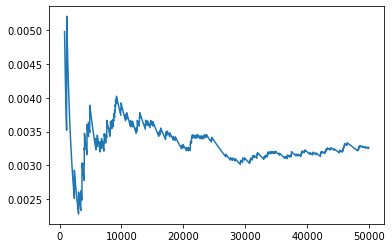

In [450]:
plt.plot(df_p[p_column][800:50000])

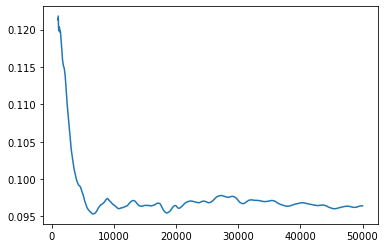

In [408]:
plt.plot(rho_windowed[800:50000])

In [347]:
rho_windowed[:4000]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3995    0.019058
3996    0.019068
3997    0.019078
3998    0.019089
3999    0.019099
Name: rho_p6, Length: 4000, dtype: float64

In [253]:
rho

0         0.333333
1         0.250000
2         0.200000
3         0.166667
4         0.142857
            ...   
580736    0.003496
580737    0.003496
580738    0.003496
580739    0.003496
580740    0.003496
Name: rho_p6, Length: 580741, dtype: float64

In [255]:
rho[:3000]

0       0.333333
1       0.250000
2       0.200000
3       0.166667
4       0.142857
          ...   
2995    0.002335
2996    0.002334
2997    0.002333
2998    0.002333
2999    0.002332
Name: rho_p6, Length: 3000, dtype: float64

In [240]:
tmp[:600]

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Name: rho_p6, Length: 600, dtype: bool

In [244]:
(tmp.rolling(100).sum()==100)[:600]

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Name: rho_p6, Length: 600, dtype: bool

In [251]:
(tmp.rolling(rolling_window).sum())[600]

62.0

In [160]:
tmp2 = rho_p1.rolling(window=50).mean()

In [321]:
tmp = abs(tmp2 - gt_p)<0.01

In [322]:
tmp

0         False
1         False
2         False
3         False
4         False
          ...  
580736    False
580737    False
580738    False
580739    False
580740    False
Name: rho_p2, Length: 580741, dtype: bool

In [179]:
rho_p1.index[tmp.rolling(100).sum()==100][0]

997

In [147]:
tmp2

0              NaN
1              NaN
2              NaN
3              NaN
4         0.280476
            ...   
580736    0.205540
580737    0.205541
580738    0.205541
580739    0.205541
580740    0.205541
Name: rho_p1, Length: 580741, dtype: float64

## Normalized

## M1

In [79]:
get_conv_rate(folder + 'model_80_1_80_500_p1_p2_smc.csv', 'rho_p1', 924, 10, True)

0.0012196216462066437

In [83]:
get_conv_rate(folder + 'model_80_1_80_500_p1_p2_smc.csv', 'rho_p2', 2232, 10, True)

0.0007270159531569451

In [84]:
get_conv_rate(folder + 'model_80_1_80_500_p3_smc.csv', 'rho_p3', 948, 10, True)

0.0014545364065621541

In [85]:
get_conv_rate(folder + 'model_80_1_80_500_p4_smc.csv', 'rho_p4', 689, 10, True)

0.0002745601686046222

In [86]:
get_conv_rate(folder + 'model_80_1_80_500_p5_smc.csv', 'rho_p5', 6821,  10, True)

0.0005165804968424505

In [87]:
get_conv_rate(folder + 'model_80_1_80_500_p6_smc.csv', 'rho_p6', 34930,  10, True)

2.8627866576306893e-05

## M2

In [88]:
get_conv_rate(folder + 'model_60_4_80_500_p1_p2_smc.csv', 'rho_p1', 549,  10, True)

0.0033354138013614956

In [89]:
get_conv_rate(folder + 'model_60_4_80_500_p1_p2_smc.csv', 'rho_p2', 381,  10, True)

0.005856714465014675

In [90]:
get_conv_rate(folder + 'model_60_4_80_500_p3_smc.csv', 'rho_p3', 260,  10, True)

0.004919983525174702

In [91]:
get_conv_rate(folder + 'model_60_4_80_500_p4_smc.csv', 'rho_p4', 399,  10, True)

0.00013425431795450015

In [92]:
get_conv_rate(folder + 'model_60_4_80_500_p5_smc.csv', 'rho_p5', 10703,  10, True)

0.0002529367881277443

In [93]:
get_conv_rate(folder + 'model_60_4_80_500_p6_smc.csv', 'rho_p6', 53591, True)

6.127800738185696e-09